<a href="https://colab.research.google.com/github/emilienaples/people_news_trust/blob/main/people_news.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##How many people trust the news? (num_reliable)

##How many people agree with the news? (agree)


In [ ]:
!pip install bioinfokit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 86 kB 3.2 MB/s 
  Created wheel for bioinfokit: filename=bioinfokit-2.1.0-py3-none-any.whl size=58665 sha256=6653930298c7ca18f3fc1fd8c40cb0967058b86fa8e5ce3146e20c88590b65a6
  Stored in directory: /root/.cache/pip/wheels/81/e6/c8/a378f0c300eba657e42ae0df674e32e6d434d96a7eb765b067
  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7097 sha256=aa8856529c0ccc9391b9a71a1a83770387275523b5978bde57ae9483f40ddbd7
  Stored in directory: /root/.cache/pip/wheels/2f/98/32/afbf902d8f040fadfdf0a44357e4ab750afe165d873bf5893d
Successfully built bioinfokit adjustText


In [ ]:
!pip install association-metrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for association-metrics: filename=association_metrics-0.0.1-py3-none-any.whl size=3954 sha256=2c7b9c16754dd3ad2f76852f11176d64daf46984894ac4b171d3b15907d4dada
  Stored in directory: /root/.cache/pip/wheels/2d/1e/07/287b993a07cc41eade32a9b863d6d4686f985d72344a9e0911
Successfully built association-metrics


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math
from bioinfokit.analys import stat

#Makes graph display in notebook
%matplotlib inline   

#ignore warnings
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn()

In [ ]:
news = pd.read_excel('PeopleNews.xlsx')
news.head()

,Age,Country,Occupation,Annual Income,Trusted Source,num_reliable,agree
0,20,USA,Student,10000,CNN,2,1
1,20,USA,Student,15000,NY Times,3,3
2,21,USA,Student,10000,NY Times,2,3
3,25,USA,Accounting,60000,None,0,0
4,35,USA,Admin Assistant,55000,Fox,2,1


In [ ]:
news.shape

(87, 7)

In [ ]:
news.describe().round(3)

,Age,Annual Income,num_reliable,agree
count,87.000,87.000,87.000,87.000
mean,31.241,44965.517,1.851,1.793
std,15.732,31099.782,1.244,1.183
min,20.000,4000.000,0.000,0.000
25%,21.000,10000.000,1.000,1.000
50%,25.000,50000.000,2.000,2.000
75%,33.000,60000.000,3.000,3.000
max,79.000,129000.000,4.000,4.000


In [ ]:
news.dtypes

Age                int64
Country           object
Occupation        object
Annual Income      int64
Trusted Source    object
num_reliable       int64
agree              int64
dtype: object

In [ ]:
# age = continous both nominal & ordinal
# country = discrete nominal
# Occupation = discrete
# Trusted Source = discrete
# Annual Income = continous
# num_reliable = discrete
# agree = discrete

In [ ]:
cat_cols = ['Occupation', 'Trusted Source',  'num_reliable', 'agree']
num_cols = ['Age', 'Annual Income']

Discrete variables should be shown in barplots rather than histograms, scatterplots are only reasonable betwen pair of continuous variables rather than discrete, boxplots should be used to compare a conntinuous variable vs discretre or categorical.



## Data Visualization

BAR PLOT FOR CATEGORICAL COLUMNS

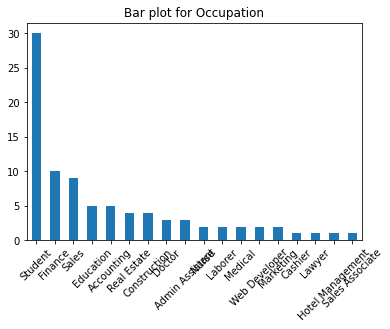

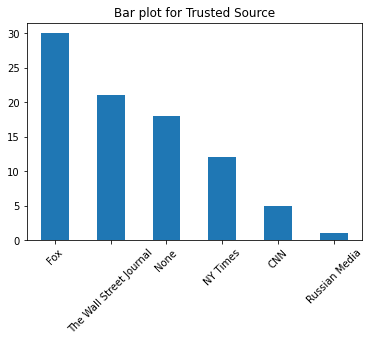

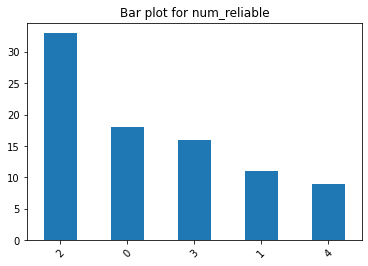

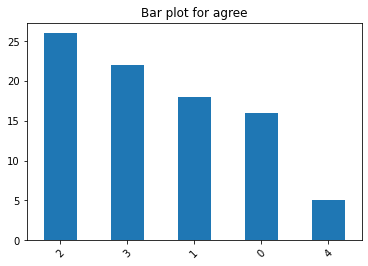

In [ ]:
for col in cat_cols:
    fig = plt.figure(figsize=(6,4)) # define plot area
    ax = fig.gca() # define axis  
    
    counts = news[col].value_counts() # find the counts for each unique category
    counts.plot.bar(ax = ax) # Use the plot.bar method on the counts data frame
    ax.set_title('Bar plot for ' + col)
    plt.xticks(rotation=45)

#Scatter Plot for Numerical Features

(Annual Income and Age)

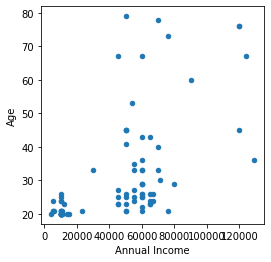

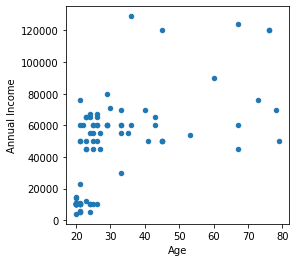

In [ ]:
fig = plt.figure(figsize=(4,4)) # define plot area
ax = fig.gca() # define axis  
news.plot.scatter(x = 'Annual Income', y = 'Age', ax = ax)

fig = plt.figure(figsize=(4,4)) # define plot area
ax = fig.gca() # define axis  
news.plot.scatter(x = 'Age', y = 'Annual Income', ax = ax)

**obtain the histogram whose area = 1  
hist(Grade, freq = F) in R**

**what is the ecdf??**

## BOX PLOTS OF CATEGORICAL COLUMNS AGAINST CONTINOUS VARIABLE AGE:

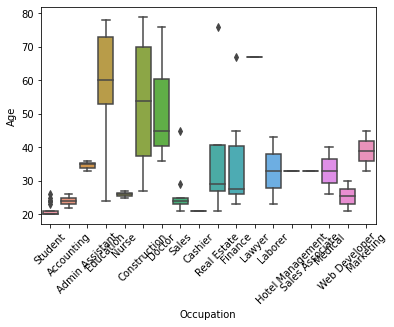

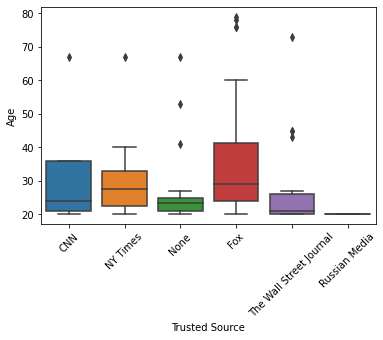

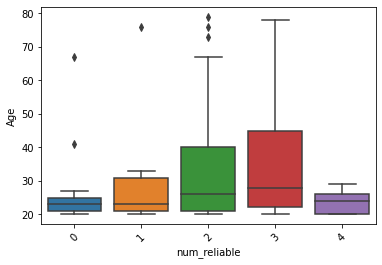

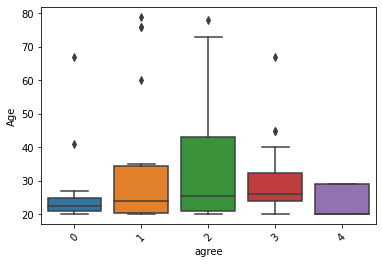

In [ ]:
for col in cat_cols:
  sns.boxplot(x=news[col], y='Age', data=news)
  plt.xlabel(col) # Set text for the x axis
  plt.xticks(rotation=45)
  plt.ylabel('Age')# Set text for y axis
  plt.show()

## BOX PLOTS OF CATEGORICAL COLUMNS AGAINST CONTINOUS VARIABLE ANNUAL INCOME:

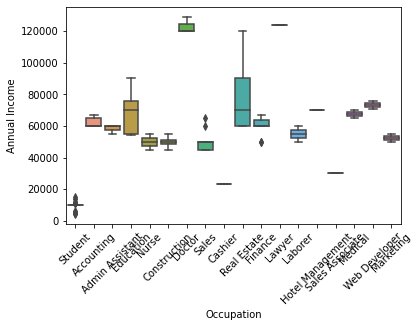

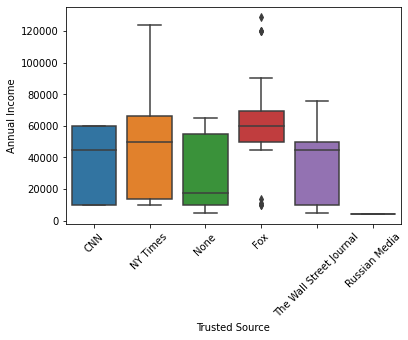

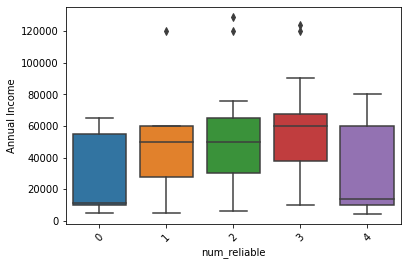

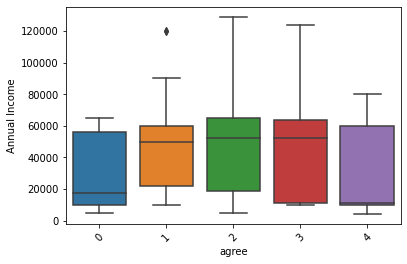

In [ ]:
for col in cat_cols:
  sns.boxplot(x=news[col], y='Annual Income', data=news)
  plt.xlabel(col) # Set text for the x axis
  plt.xticks(rotation=45)
  plt.ylabel('Annual Income')# Set text for y axis
  plt.show()

## Transforming Skewed Features

## Skewness for numerical features:

In [ ]:
num_feats = news.dtypes[news.dtypes != 'object'].index
skew_feats=news[num_feats].skew().sort_values(ascending=False)
skewness=pd.DataFrame({'Skew': skew_feats})

skewness

,Skew
Age,1.847848
Annual Income,0.545060
num_reliable,-0.043681
agree,-0.061708


We see that Age is very right skewed. There are also two populations for Occupation, 'Student' and 'Other'.
  
  

Annual Income has gaps in the distribution. So for Annual Income there are also several populations.  

## AGE

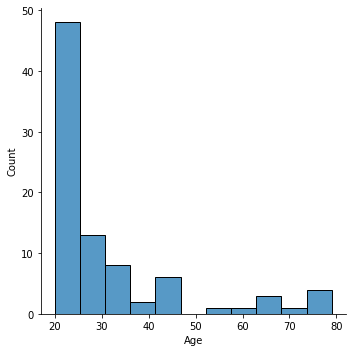

In [ ]:
sns.displot(news.Age)

## AGE -- TRANSFORMATION: LOG(AGE)

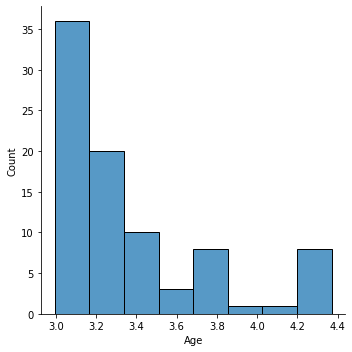

In [ ]:
age_log = np.log(news.Age)
sns.displot(data=age_log)

We could directly fit a model with the log-transformed data or divide into subpopulations on the original Age variable

# Divide subpopulations for Age

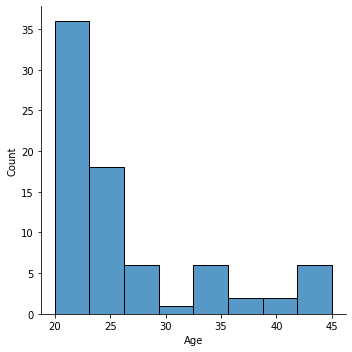

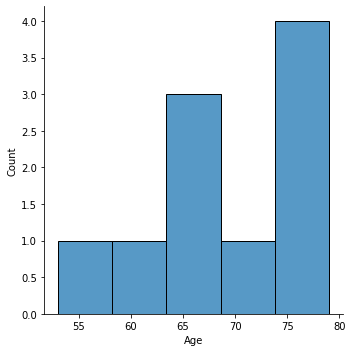

In [ ]:
under_50 = news.loc[news['Age'] <= 50]
over_50 = news.loc[news['Age'] > 50]

sns.displot(under_50['Age'])
sns.displot(over_50['Age'])

## Log-transform subpopulations

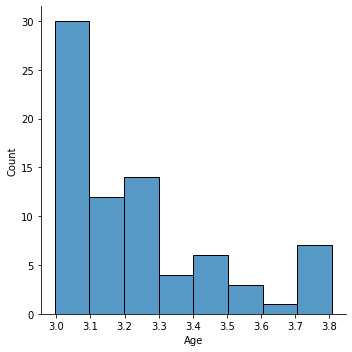

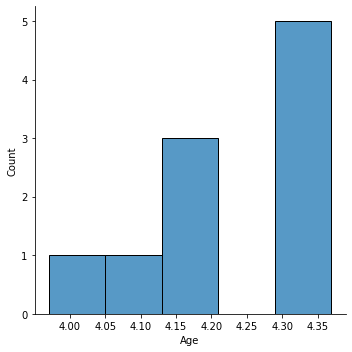

In [ ]:
under_50_log = np.log(under_50['Age'])
sns.displot(data=under_50_log)

over_50_log = np.log(over_50['Age'])
sns.displot(data=over_50_log)

**Conclusion for continous variable AGE:**,
THERE ARE GAPS IN THE DISTRIBUTION WHEN SPLITTING THE POPULATIONS AND THEN TAKING THE LOG(UNDER_50) AND LOG(OVER_50) 

Do we stick with the non-transformed variable?

## Annual Income



Make Groups -- Mean Income by Job

In [ ]:
mean_income_by_job = news.groupby('Occupation').agg({'Annual Income':'mean'}).round(2)
mean_income_by_job = mean_income_by_job.reset_index()
mean_income_by_job

,Occupation,Annual Income
0,Accounting,62400.00
1,Admin Assistant,58333.33
2,Cashier,23000.00
3,Construction,50000.00
4,Doctor,123000.00
5,Education,69000.00
6,Finance,59700.00
7,Hotel Management,70000.00
8,Laborer,55000.00
9,Lawyer,124000.00


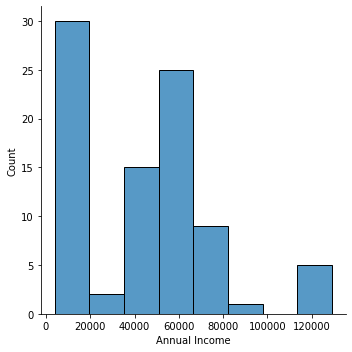

In [ ]:
sns.displot(news['Annual Income'])

 ## Annual Income: Transformation: log(Annual Income)

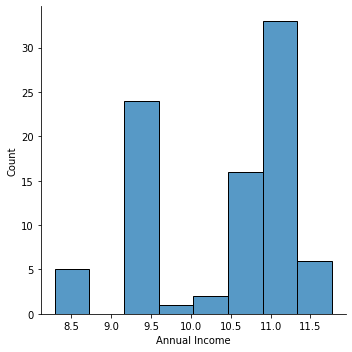

In [ ]:
income_log = np.log(news['Annual Income'])
sns.displot(data=income_log)

taking the log of ANNUAL INCOME doesn't help...

## Split Annual Income by Job into Groups



In [ ]:
under_40 = news.loc[news['Annual Income'] < 40000]
between_40_80 = news.loc[news['Annual Income'].between(40000, 80000, 'both')]
over_80 = news.loc[news['Annual Income'] >= 80000]

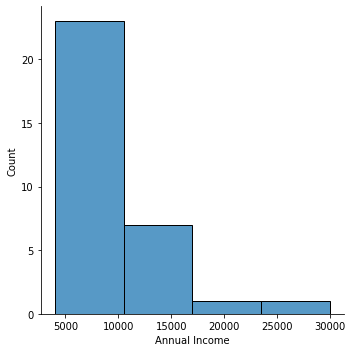

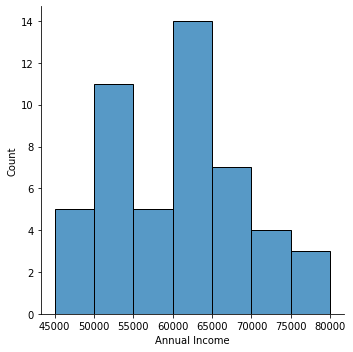

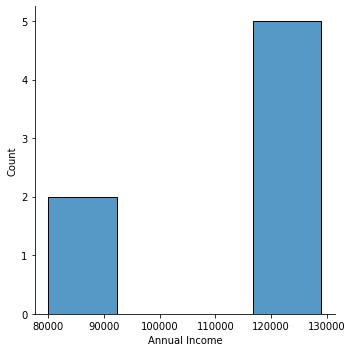

In [ ]:
sns.displot(under_40['Annual Income'],bins=4)
sns.displot(between_40_80['Annual Income'])
sns.displot(over_80['Annual Income'])

## LOG Transformation on Annual Income subpopulations

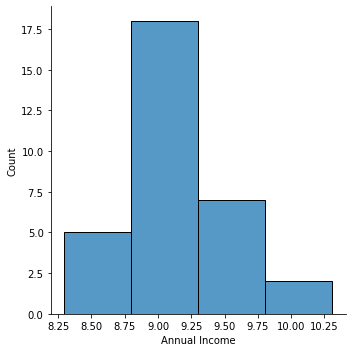

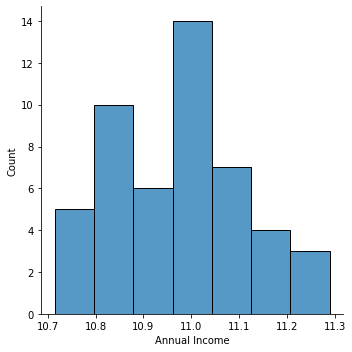

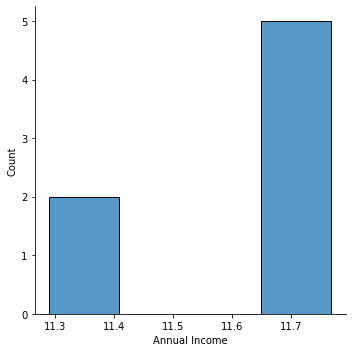

In [ ]:
under_40_log = np.log(under_40['Annual Income'])
sns.displot(data=under_40_log, bins=4)

between_40_80_log = np.log(between_40_80['Annual Income'])
sns.displot(data=between_40_80_log)

over_80_log = np.log(over_80['Annual Income'])
sns.displot(data=over_80_log)

Okay, same is also true for **continous variable ANNUAL INCOME:**,   

**CONCLUSION**
splitting into 3 subpopulations for groups: 

1.   under 20,000
2.   between 20,000 and 80,000
3.   and over 80,000    
  
    
and then log-transforming each variable seems to give a smoother distribution...  
**But we may want to truncate upper bounded outliers**

## Model Fitting -- Age

Fit a univariate distribution model for each continuous (possibly transformed) variable.  Select the best model using the AIC criteria

In [ ]:
pip install fitter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for fitter: filename=fitter-1.5.1-py3-none-any.whl size=25596 sha256=f9bf5261a863515210b5f4f72398a411189100c1bfb7a54cdaa0ca51bbabac42
  Stored in directory: /root/.cache/pip/wheels/40/65/62/57b872ba7af36e70111b1f67cffe76f97c747804aff7665ccb
Successfully built fitter


## We will attempt to fit a distribution for each of the   
## transformed subpopulations within AGE

## LOG(Subpopulation Under 50)

**we first fit the log values even though they seemed to mess up the distribution**

Fitting 5 distributions: 100%|██████████| 5/5 [00:00<00:00,  5.41it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
beta,4.244667,11.520511,-205.781723,0.128778,0.207792,2.150513e-03
gamma,6.769570,79.155986,-174.183913,0.520560,0.599467,5.519756e-27
burr,9.912090,14.477377,-140.478647,0.255656,0.177163,1.384790e-02
norm,14.696650,7.872884,-118.838702,0.391337,0.165018,2.665807e-02
lognorm,23.370587,54.791488,-78.777776,0.113227,0.420611,7.293791e-13


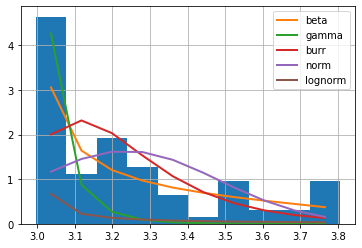

In [ ]:
from fitter import Fitter, get_common_distributions, get_distributions
pop_under_50 = under_50_log.values
f_50 = Fitter(pop_under_50,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"], bins=10)
f_50.fit()
f_50.summary()

In [ ]:
f_50.get_best(method = 'sumsquare_error')

{'beta': {'a': 0.4618655150324036,
  'b': 1.3276538064417807,
  'loc': 2.9957322735539904,
  'scale': 0.9587610001895304}}

## LOG(Subpopulation Over 50)

Fitting 5 distributions: 100%|██████████| 5/5 [00:00<00:00,  7.00it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
burr,18.691916,0.954719,15.465401,inf,0.207373,0.710250
beta,19.193575,-0.529110,15.730246,inf,0.173370,0.876252
norm,39.117907,-4.417600,18.245123,inf,0.199105,0.753312
lognorm,39.301886,-2.422018,20.594629,inf,0.200263,0.747366
gamma,40.702686,-2.596327,20.944845,inf,0.214642,0.671443


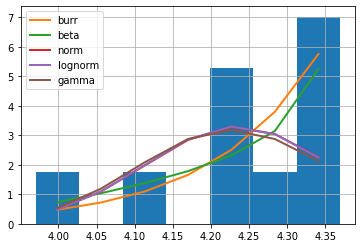

In [ ]:
from fitter import Fitter, get_common_distributions, get_distributions
pop_over_50 = over_50_log.values
f_over50 = Fitter(pop_over_50,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"], bins=7)
f_over50.fit()
f_over50.summary()

In [ ]:
f_over50.get_best(method = 'sumsquare_error')

{'burr': {'c': 363479.413846183,
  'd': 0.02952826763498609,
  'loc': -1469.0486681465386,
  'scale': 1473.4220494661176}}

##Again, we have found a distribution model for the LOG of the split populations:   
## over_50_log and under_50_log

**This didn't turn out great... what if we find distributions just for the subpopulations without transforming them**

## Under 50 NOT TRANSFORMED

Fitting 5 distributions: 100%|██████████| 5/5 [00:00<00:00,  5.46it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
burr,0.004076,90.164780,-740.794735,inf,0.175222,1.542514e-02
gamma,0.004628,107.897654,-735.365880,inf,0.391130,4.012846e-11
beta,0.005996,83.254119,-711.085671,inf,0.207787,2.151289e-03
norm,0.016534,79.268487,-641.663956,inf,0.215639,1.270699e-03
lognorm,0.025479,117.660463,-604.025309,inf,0.453404,5.601784e-15


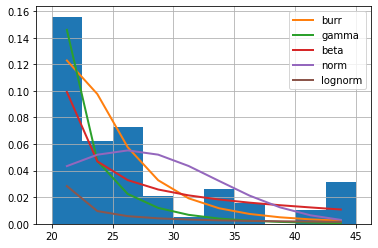

In [ ]:
from fitter import Fitter, get_common_distributions, get_distributions
pop_under_50 = under_50['Age'].values
f_50 = Fitter(pop_under_50,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"], bins=10)
f_50.fit()
f_50.summary()

## Over 50 NOT TRANSFORMED

Fitting 5 distributions: 100%|██████████| 5/5 [00:00<00:00,  6.89it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
beta,0.001415,42.673590,-79.422111,0.106646,0.160840,0.923056
norm,0.002952,39.221153,-76.672793,0.203292,0.188072,0.808983
gamma,0.003011,41.160276,-74.173223,0.204056,0.187907,0.809793
burr,0.003529,44.056283,-70.281752,0.206364,0.241048,0.530018
lognorm,0.008918,59.105185,-63.314985,0.836358,0.428701,0.034802


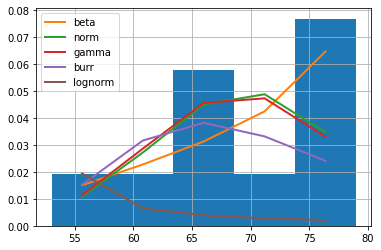

In [ ]:
from fitter import Fitter, get_common_distributions, get_distributions
pop_over_50 = over_50['Age'].values
f_over50 = Fitter(pop_over_50,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"], bins=5)
f_over50.fit()
f_over50.summary()

## **The AICs are higher when we don't fit the transformed variable..**   
## **BUT THE DISTRIBUTIONS ARE NICER....**  
## **WHICH DO WE CHOOSE???**

moving on to income....

## Model Fitting: LOG(Annual Income -- Under 40,000)

Again, attempt to fit a distribution for each of the LOG TRANSFORMED  subpopulations within Annual Income... there are 3 groups

Fitting 5 distributions: 100%|██████████| 5/5 [00:00<00:00,  8.19it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
burr,0.064115,19.324469,-184.946908,0.065050,0.348554,0.000559
gamma,0.078130,14.407517,-182.086528,0.036624,0.359060,0.000336
lognorm,0.082964,14.436323,-180.165672,0.038814,0.356570,0.000380
norm,0.093436,12.497812,-179.827310,0.043358,0.352437,0.000464
beta,inf,inf,inf,inf,NaN,NaN


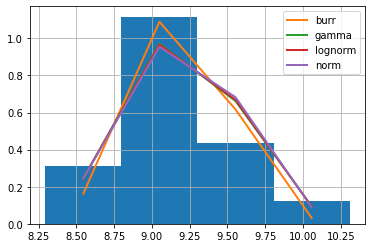

In [ ]:
from fitter import Fitter, get_common_distributions, get_distributions
income_under_40 = under_40_log.values
f_income_under_40 = Fitter(income_under_40,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"], bins=4)
f_income_under_40.fit()
f_income_under_40.summary()

In [ ]:
f_income_under_40.get_best(method = 'sumsquare_error')

{'burr': {'c': 60.57823574710625,
  'd': 0.6116436572613504,
  'loc': 0.28501362354293047,
  'scale': 9.032268658605606}}

 This is not great but better than before. We could maybe fit the NON-TRANSFORMED data for INCOME.... but I think it would be worse

## Model Fitting: LOG(Annual Income -- between 40,000 and 80,000)

Fitting 5 distributions: 100%|██████████| 5/5 [00:00<00:00,  5.17it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
norm,12.240176,-2.123173,-60.184093,0.299269,0.168591,0.109636
gamma,12.315863,-0.147739,-55.990215,0.301735,0.172213,0.096808
lognorm,12.363164,-0.165363,-55.802385,0.303173,0.174033,0.090849
beta,13.875896,-1.342610,-46.254404,0.285428,0.160536,0.143204
burr,13.992410,2.016503,-45.844676,0.343972,0.212155,0.020535


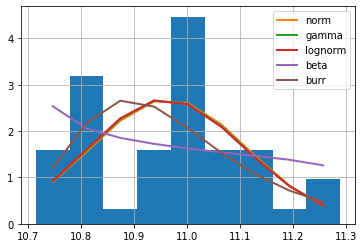

In [ ]:
from fitter import Fitter, get_common_distributions, get_distributions
income_bet_40_80 = between_40_80_log.values
f_income_bet_40_80 = Fitter(income_bet_40_80,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"], bins=9)
f_income_bet_40_80.fit()
f_income_bet_40_80.summary()

In [ ]:
f_income_bet_40_80.get_best(method = 'sumsquare_error')

{'norm': {'loc': 10.965571541301834, 'scale': 0.14848366325660692}}

## Model Fitting: LOG(Annual Income -- over 80,000)

Fitting 5 distributions: 100%|██████████| 5/5 [00:00<00:00,  6.02it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
beta,40.506614,13.265255,20.072526,inf,0.419795,0.124146
lognorm,41.463580,1.830949,18.290068,inf,0.401929,0.155821
norm,41.467679,-0.185221,16.344849,inf,0.402926,0.153892
gamma,42.406260,1.689214,18.447431,inf,0.408953,0.142655
burr,45.520683,3.846207,20.889437,inf,0.397490,0.164648


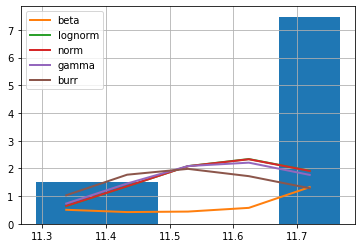

In [ ]:
from fitter import Fitter, get_common_distributions, get_distributions
income_over_80 = over_80_log.values
f_income_over_80 = Fitter(income_over_80,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"], bins=5)
f_income_over_80.fit()
f_income_over_80.summary()

In [ ]:
f_income_over_80.get_best(method = 'sumsquare_error')

{'beta': {'a': 0.2560684861762731,
  'b': 0.10360116180931805,
  'loc': 11.20482456904541,
  'scale': 0.5627431142983995}}

## **CONCLUSION: LET'S DIVIDE THE GROUPS DIFFERENTLY AND TRUNCATE, HONESTLY.... AND REFORM GROUPS**

## Let's divide income into 2 groups and truncate the rest   
Group 1: under 40,000   
Group 2: between 40,000 and 90,000

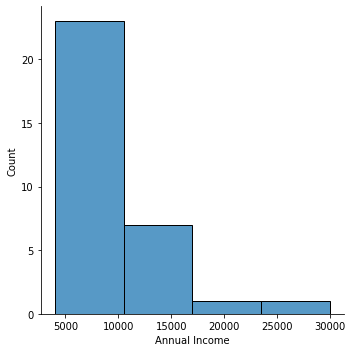

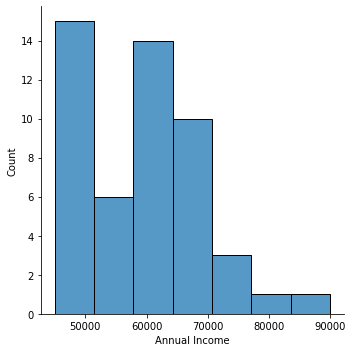

In [ ]:
under_40 = news.loc[news['Annual Income'] < 40000]
between_40_90 = news.loc[news['Annual Income'].between(40000, 90000, 'both')]

sns.displot(under_40['Annual Income'], bins=4)
sns.displot(between_40_90['Annual Income'])

Does log transformation help?

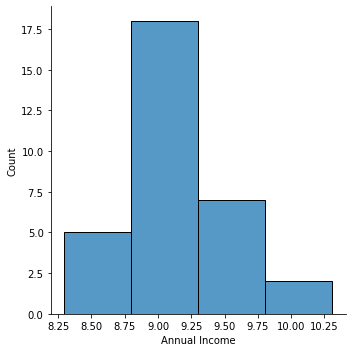

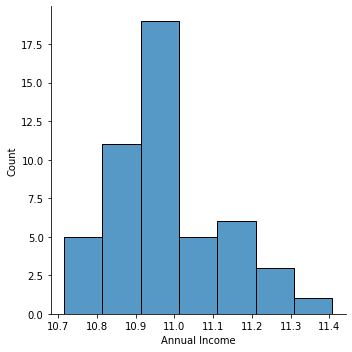

In [ ]:
under_40_log = np.log(under_40['Annual Income'])
sns.displot(data=under_40_log, bins=4)

between_40_90_log = np.log(between_40_90['Annual Income'])
sns.displot(data=between_40_90_log)

Yes it does.   
## Conclusion: truncating the income variable at 90,000 for outliers higher than this value creates a better distribution.

Let's get a model -- LOG(under 40 group 1)

Fitting 5 distributions: 100%|██████████| 5/5 [00:00<00:00,  9.84it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
burr,0.595785,22.328565,-113.612645,0.449657,0.348554,0.000559
norm,1.185211,14.876667,-98.534606,0.605110,0.352437,0.000464
lognorm,1.212822,16.797070,-94.331935,0.616155,0.356570,0.000380
gamma,1.228267,16.760349,-93.927013,0.621922,0.359060,0.000336
beta,inf,inf,inf,inf,NaN,NaN


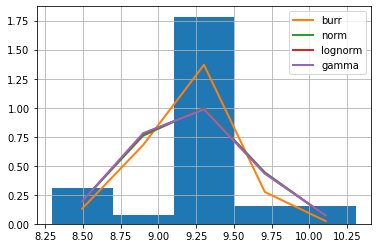

In [ ]:
from fitter import Fitter, get_common_distributions, get_distributions
income_under_40 = under_40_log.values
f_income_under_40 = Fitter(income_under_40,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"], bins=5)
f_income_under_40.fit()
f_income_under_40.summary()

In [ ]:
f_income_under_40.get_best(method = 'sumsquare_error')

{'burr': {'c': 60.57823574710625,
  'd': 0.6116436572613504,
  'loc': 0.28501362354293047,
  'scale': 9.032268658605606}}

LOG(GROUP 2-- between 40 and 90)

Fitting 5 distributions: 100%|██████████| 5/5 [00:00<00:00,  6.97it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
norm,3.516353,3.948058,-124.905883,0.123889,0.148915,1.967019e-01
gamma,3.831354,5.312071,-116.704173,0.136613,0.179251,7.070703e-02
lognorm,3.842081,5.426888,-116.564374,0.136520,0.175421,8.131429e-02
burr,4.128976,7.011970,-109.051592,0.152959,0.201211,2.990207e-02
beta,6.442360,9.301712,-86.808309,0.370753,0.378191,6.180609e-07


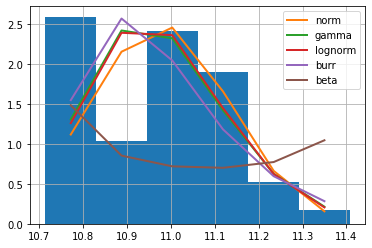

In [ ]:
from fitter import Fitter, get_common_distributions, get_distributions
income_between_40_90 = between_40_90_log.values
f_income_between_40_90 = Fitter(income_between_40_90 ,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"], bins=6)
f_income_between_40_90.fit()
f_income_between_40_90.summary()

In [ ]:
f_income_between_40_90.get_best(method = 'sumsquare_error')

{'norm': {'loc': 10.974411409462045, 'scale': 0.1594850164574259}}

## TRUNCATING ANNUAL INCOME TO STOP AT 90,000 IS WAY BETTER FOR THE AIC AND DISTRIBUTION for the second subpopulation!!

## Hypothesis tests -- STATISTICAL INFERENCE

## Statistical Inference of one variable  





## NUM_RELIABLE  
According to the news given in https://www.pewresearch.org/journalism/2019/03/26/americans-give-fairly-high-marks-to-their-local-news-media-especially-when-journalists-are-seen-as-connected-to-the-community/, about 71% of adult Americans think that the media reports news accurately. However, it is known that people usually only trust 1 or none of the sources listed out of 4 if 2 are left leaning and 2 are right leaning. (This is different from the number of sources they agree with). So, using data from the survey, I will perform a hypothesis test to see if there is statistical evidence that the mean of this sample for the variable NUM_RELIABLE is equal to the hypothesized or known population mean, 1.  
  
   If the p-value is smaller than alpha, we can reject the test with a level of significance alpha.   
     
  **Note: We are able to use a t-test here because of the CENTRAL LIMIT THEOREM which states that if the sample size is large enough, the sample distribution of the MEAN will always be normally distributed or APPROACH A NORMAL DISTRIBUTION. Regardless of whether the population has a normal, Poisson, binomial, or any other distribution, the sampling distribution of the mean will be normal [1].**

In [ ]:
news[['num_reliable']].agg([np.mean,np.std]).round(2)

,num_reliable
mean,1.85
std,1.24


We now examine the true population mean, which in the real world is 1, because out of 4 sources (two right leaning and two left leaning), people on average tend to trust only 1 OR 0.  
We are interested in rejecting the null hypothesis and finding statistical evidence for the alternative.

In our sample, on average, people trust 1.85 sources listed.   

This is half the number of sources listed in the survey. **We form several hypotheses.**   


> **Hypothesis 0:** Sample mean is equal to the hypothesized or known population mean: **mean(num_reliable_sources) = 1**


> **Hypothesis 1:** Sample mean is less than the known population mean  
**mean(num_reliable_sources) < 1**   

> **Hypothesis 2:** Sample mean is greater than the known population mean:   
**mean(num_reliable_sources) > 1**  

The sample t-test formula is:


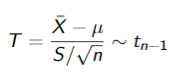

and follows approximately a t-distribution with n-1 degrees of freedom. x bar is the sample mean, u is the known mean, s is the sample standard deviation (an estimate of the population standard deviation), and n is the sample size.     
  
  Our t test also calculates a confidence interval for u, the known population mean, for which the formula is:

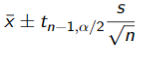

## Hypothesis 0 and Hypothesis 1

In [ ]:
# Is the sample mean less than the popmean?
a = news['num_reliable'].to_numpy()
stats.ttest_1samp(a=a, popmean=1, alternative='less')

Ttest_1sampResult(statistic=6.378252182095851, pvalue=0.9999999956763631)

## Hypothesis 0 and 2

In [ ]:
# is the sample mean greater than the popmean?
a = news['num_reliable'].to_numpy()
stats.ttest_1samp(a=a, popmean=1, alternative='greater')

Ttest_1sampResult(statistic=6.378252182095851, pvalue=4.323636951486357e-09)

**Conclusion:**  

The first test is not significant but the second test is significant. We have p < 0.05, so when comparing H_2 and H_0, we can reject the H_0, implying that the mean of the sample is greater than the mean of the whole population.

**Confidence Intervals** : Also, we see a confidence interval for the mean of this variable should be between 1.58 and 2.11. This is NOT the actual variable or its distribution. But we can conclude that the true value of the true population mean for the variable num_reliable will be found between this interval 95% of the time.

In [ ]:
res = stat()
res.ttest(df=news, test_type=1, res='num_reliable', mu=1)
print(res.summary)


One Sample t-test 

------------------  ------------
Sample size         87
Mean                 1.85057
t                    6.37825
Df                  86
p value (one-tail)   4.32364e-09
p value (two-tail)   8.64727e-09
Lower 95.0%          1.58547
Upper 95.0%          2.11568
------------------  ------------


## ANNUAL INCOME 

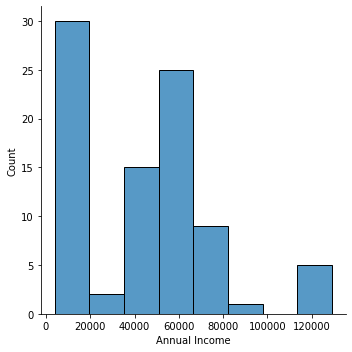

In [ ]:
sns.displot(news['Annual Income'])

It was NOT POSSIBLE to find research on income level and media trust directly (and surprisingly). The only thing I did find was the comparison between higher (or lower) education and trust in the news. Higher education is related to higher income, but they do not always imply each other. Later in the multivariate analysis, I am using this relationship between higher/lower education and trust in the media to explore a possible relationship between income and trust in the media.
  
According to the news given in https://www.pewresearch.org/journalism/2019/12/12/factors-beyond-party-affiliation-also-connect-with-trust-in-the-news-media/, an average of about 33% of people with at least a college degree (more education) say they trust the news (verses 17% of those with some college or less) [3].
   
   Here though, using data from the survey, I will perform a hypothesis test to see if there is statistical evidence that the sample mean for ANNUAL INCOME is equal to the hypothesized or known population mean for ANNUAL INCOME for adults in the US. We know that the average income in the US is $54132 annually.

We form 3 hypotheses:

> **Hypothesis 0:**   
Sample mean is equal to the hypothesized or known population mean: 
**mean(Annual Income) = 54132**



> **Hypothesis 1:**   
Sample mean is less than the known population mean  **mean(Annual Income) < 54132**



> 
> **Hypothesis 2:**   
Sample mean is greater than the known population mean  **mean(Annual Income) > 54132**



In [ ]:
news[['Annual Income']].agg([np.mean,np.std]).round(2)

,Annual Income
mean,44965.52
std,31099.78


## Hypothesis 0 and 1

In [ ]:
# is the sample mean less than the popmean?
a = news['Annual Income'].to_numpy()
stats.ttest_1samp(a=a, popmean=54132, alternative='less')

Ttest_1sampResult(statistic=-2.749191550582362, pvalue=0.0036401082704117455)

Okay, the test is significant. It looks like we can reject the null hypothesis that the sample mean is equal to the known population mean, which would automatically imply Hypothesis 1. Then we know that the sample mean is less than the population mean.

## Hypothesis 0 and 2

In [ ]:
# is the sample mean greater than the population mean?
a = news['Annual Income'].to_numpy()
stats.ttest_1samp(a=a, popmean=54132, alternative='greater')

Ttest_1sampResult(statistic=-2.749191550582362, pvalue=0.9963598917295883)

The test is not significant, so we can not say anything when comparing Hypothesis 0 and 2.




**CONCLUSION:** **The population mean is greater than the sample mean**

In [ ]:
res = stat()
res.ttest(df=news, test_type=1, res='Annual Income', mu=54132)
print(res.summary)


One Sample t-test 

------------------  --------------
Sample size            87
Mean                44965.5
t                      -2.74919
Df                     86
p value (one-tail)      0.00364011
p value (two-tail)      0.00728022
Lower 95.0%         38337.3
Upper 95.0%         51593.8
------------------  --------------


**Confidenece Interval:**  It appears that a confidence interval for the mean of this variable should be between about 38,337 USD and 51,593 USD, meaning that the true value of the true population mean for this variable (Annual Income) will be found between these values 95% of the time.

## AGREE  
According to the news given in https://www.pewresearch.org/fact-tank/2021/08/30/partisan-divides-in-media-trust-widen-driven-by-a-decline-among-republicans/, AND from what we know already, most people agree with 2 sources out of 4 listed if 2 are from the right and 2 are from the left.   
  
  Using data from the survey, I will perform a hypothesis test to see if there is statistical evidence that the sample mean is equal to or smaller than the hypothesized or known population mean for the variable AGREE.

  We can do this because of the CENTRAL LIMIT THEOREM which states that if the sample size is large enough, the sample distribution of the MEAN will always be normally distributed or APPROACH A NORMAL DISTRIBUTION.
  
   If the p-value is smaller than alpha, we can reject the test with a level of significance alpha.

In [ ]:
news[['agree']].agg([np.mean,np.std]).round(2)

,agree
mean,1.79
std,1.18


In our sample, on average, people agree with 1.79 sources listed in the sample.   

**We form two hypotheses.**   


> **Hypothesis 0:** Sample mean is equal to the hypothesized or known population mean in the real world: **mean(agree) = 2**



> **Hypothesis 1:** Sample mean is less than the known population mean in the real world:  
**mean(agree) < 2**   


>**Hypothesis 2:** Sample mean is greater than the known population mean in the real world:  
**mean(agree) > 2**



We examine the true population mean, which in the real world is 2, because out of 4 sources (two right leaning and two left leaning), people on average tend to AGREE with the 2 that align with their political options.  
We are interested in rejecting the null hypothesis and finding statistical evidence for the alternative.

## Hypothesis 0 and 1

In [ ]:
# is the sample mean less than the known population mean?
a = news['agree'].to_numpy()
stats.ttest_1samp(a=a, popmean=2, alternative='less')

Ttest_1sampResult(statistic=-1.6318223054907808, pvalue=0.05318680118040103)

The test is very close to being significant, but because p is still not LESS THAN alpha = 0.05, we still must not reject Hypothesis 0, which does not tell us anything about Hypothesis 1.

# Hypothesis 1 and 2

In [ ]:
# is the sample mean greater than the popmean?
a = news['agree'].to_numpy()
stats.ttest_1samp(a=a, popmean=2, alternative='greater')

Ttest_1sampResult(statistic=-1.6318223054907808, pvalue=0.9468131988195989)

The test is not significant. Our p value is higher than our desired alpha: 0.05. We can not reject Hypothesis 1, which does not automatically mean it is true either.

In [ ]:
res = stat()
res.ttest(df=news, test_type=1, res='agree', mu=2)
print(res.summary)


One Sample t-test 

------------------  ----------
Sample size         87
Mean                 1.7931
t                   -1.63182
Df                  86
p value (one-tail)   0.0531868
p value (two-tail)   0.106374
Lower 95.0%          1.54106
Upper 95.0%          2.04515
------------------  ----------


**Confidence Interval:** An appropriate confidence interval for the mean of this variable is (1.54, 2.04). We know that the true value of the true population mean for this variable (agree) will be found within this interval 95% of the time.

## AGE

According to the National Census Bureau, the average age in the US is 38.8 years old.
  
  Using data from the survey, I will perform a hypothesis test to see if there is statistical evidence that the sample mean is equal to or smaller than the hypothesized or known population mean for the variable AGE. We will assume that AGE, again, follows a normal distribution with unknown variance, just like we have for the last three variables.   

  We can do this because of the CENTRAL LIMIT THEOREM which states that if the sample size is large enough, the sample distribution of the MEAN will always be normally distributed or APPROACH A NORMAL DISTRIBUTION.
  
  Again, if the p-value is smaller than alpha, we can reject the test with a level of significance alpha.

In [ ]:
news[['Age']].agg([np.mean,np.std])

,Age
mean,31.241379
std,15.731738


## Hypothesis 0 and 1

In [ ]:
# is the sample mean less than the popmean?
a = news['Age'].to_numpy()
stats.ttest_1samp(a=a, popmean=38.8, alternative='less')

Ttest_1sampResult(statistic=-4.481521479865284, pvalue=1.1355640190743495e-05)

Okay, this test is definitely significant. We can reject Hypothesis 0 which implies Hypothesis 1. In other words, yes. The sample mean is less than the true population mean.

## Hypothesis 0 and 2

In [ ]:
# is the sample population age greater than the true population age?
a = news['Age'].to_numpy()
stats.ttest_1samp(a=a, popmean=38.8, alternative='greater')

Ttest_1sampResult(statistic=-4.481521479865284, pvalue=0.9999886443598093)

This test is not significant.

**Conclusion: Hypothesis 1 seems to be correct.**

In [ ]:
res = stat()
res.ttest(df=news, test_type=1, res='Age', mu=38.8)
print(res.summary)


One Sample t-test 

------------------  ------------
Sample size         87
Mean                31.2414
t                   -4.48152
Df                  86
p value (one-tail)   1.13556e-05
p value (two-tail)   2.27113e-05
Lower 95.0%         27.8885
Upper 95.0%         34.5943
------------------  ------------


**Confidence Interval:** We know that the true value of the true population mean for this variable (Age) will be found between 27.88 and 34.59, 95% of the time.

## Hypothesis tests -- STATISTICAL INFERENCE

## Statistical Inference of two variables  


**In this section I will explore not only the dependence between certain variables, but also the following questions:**  
   
1) Is Age related to Annual Income?  
2) Is num_reliable related to Annual Income?  
3) Does occupation influence trust?   
4) Does occupation influence agreement?  
5) Does occupation influence agreement with certain news channels? (occupation, Trusted Source)

*Perform interesting hypothesis test based on two variables.   
 These can be different depending on yourdata.    
 For example, you may want to test if two categorical variables are related to one another.   
  Oryou may want to compare if there are statistical differences in the mean of two (or more) populations.  
  In case you have two paired continuous variables, you may want to test if there exist significant linearcorrelation between them.*

## Statistical Testing

Inference methods for two qualitative variables:   

contingency table  
Chi-square distribution 
  
    
Methods for two quantitative (continous):  
correlation  
mean comparison  
regression


## Two continuous variables

## 1) Is Age related to Annual Income ?

## Correlation
Although a pearson correlation matrix only measures linear correlation, we will look at it here anyways because both of the variables are continuous:

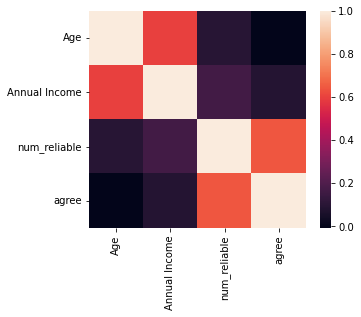

In [ ]:
corrmat = news.corr(method='pearson')
f,ax = plt.subplots(figsize=(5,4))
sns.heatmap(corrmat, square=True)

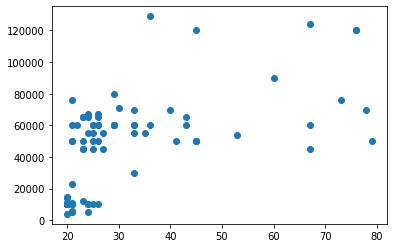

In [ ]:
# Is Age related to Annual Income
x = news['Age']
y = news['Annual Income']
plt.scatter(x,y)
plt.show()

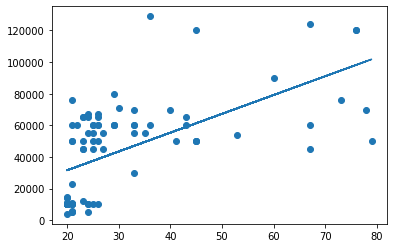

In [ ]:
slope, intercept, r, p, std_error = stats.linregress(x,y)


# get new values the represent where on the y axis the corresponding x value is placed
def myfunc(x):
  return slope * x + intercept

# run each x through the funcion, will result in news array w/ new vals for y axis
mymodel = list(map(myfunc, x))

plt.scatter(x,y)
plt.plot(x, mymodel) # draw regression line
plt.show()

In [ ]:
print(slope, intercept, r, p, std_error)

1189.0530981767047 7817.858381100188 0.6014791717043076 7.238485924868574e-10 171.2999958791366


Correlation coefficient r = 0.6 tells us that there is quite a relationship between these two variables. It's not perfect but indicates that we could use linear regression to predict future values.

## One qualitative and one quantitative

ANOVA (Analysis of Variance) checks if the means of two or more groups are significantly different from each other. It checks the impact of one or more factors by comparing the means of different samples.

# 2) Is num_reliable related to Annual Income?



> Hypothesis 0: mean(num_reliable) = mean(Annual Income)

> Hypothesis 1: mean(num_reliable) != mean(Annual Income)




In [ ]:
from scipy.stats import f_oneway
f_oneway(news['Age'], news['num_reliable'])

F_onewayResult(statistic=301.77429991659824, pvalue=1.0873653801979795e-39)

Our p value indicates that the test is significant (p < 0.05. We can reject the null hypothesis then that the means of the two variables are equal). This implies we have sufficient proof to say that Age of the user DOES have an impact on the amount of sources people in this sample find reliable.

## Two quantitative variables

## 3) Does occupation influence trust?  
To examine this relationship I will use a chi-square test. This method is used to make an assumption about the distribution of a variable or to decide if a relationship between 2 variabes exists. When performing this test, an X^2 distribution curve is formed, which directly depends on the **number of degrees of freedom.** This is how an inference is able to be made.  


> Hypothesis 0: Num_reliable and Occupation have no relationship.


> Hypothesis 1: Num_reliable and Occupation have a relationship.

Degrees of freedom for X^2 independence test statistics = (# rows-1)*(# columns-1)  
  
  So if Hypothesis 0 is true, the statistic will approximate a Chi-square distribution with (# rows-1)*(# columns-1) degress of freedom, if the sample size is large enough. 





In [ ]:
# CHI SQUARE TEST
# two qualitative
# create contingency table
data_crosstab = pd.crosstab(news['Occupation'],
                            news['num_reliable'],
                           margins=True, margins_name="Total")

# significance level
alpha = 0.05

# Calcualtion of Chisquare
chi_square = 0
rows = news['Occupation'].unique()
columns = news['num_reliable'].unique()
for i in columns:
    for j in rows:
        O = data_crosstab[i][j]
        E = data_crosstab[i]['Total'] * data_crosstab['Total'][j] / data_crosstab['Total']['Total']
        chi_square += (O-E)**2/E

# The p-value approach
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and p value is:", p_value)
print(conclusion)
    
# The critical value approach
print("\n--------------------------------------------------------------------------------------")
print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
critical_value = stats.chi2.ppf(1-alpha, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if chi_square > critical_value:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and critical value is:", critical_value)
print(conclusion)


Approach 1: The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 74.71527777777779  and p value is: 0.2693935265817633
Failed to reject the null hypothesis.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
chisquare-score is: 74.71527777777779  and critical value is: 88.25016442187412
Failed to reject the null hypothesis.


We have failed to reject the null hypothesis in both cases. But again, this doesn't mean we can find evidence for Hypothesis 1. And THIS fact doesn't mean there is evidence that Hypothesis 0 is true either, as we have seen from the test. It is not significant.

## 4) Does occupation influence agreement?


> Hypothesis 0: The two variables have no relationship.


> Hypothesis 1: The two variables have a relationship.



In [ ]:
# CHI SQUARE TEST
# two qualitative
# create contingency table
data_crosstab = pd.crosstab(news['Occupation'],
                            news['agree'],
                           margins=True, margins_name="Total")

# significance level
alpha = 0.05

# Calcualtion of Chisquare
chi_square = 0
rows = news['Occupation'].unique()
columns = news['agree'].unique()
for i in columns:
    for j in rows:
        O = data_crosstab[i][j]
        E = data_crosstab[i]['Total'] * data_crosstab['Total'][j] / data_crosstab['Total']['Total']
        chi_square += (O-E)**2/E

# The p-value approach
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and p value is:", p_value)
print(conclusion)
    
# The critical value approach
print("\n--------------------------------------------------------------------------------------")
print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
critical_value = stats.chi2.ppf(1-alpha, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if chi_square > critical_value:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and critical value is:", critical_value)
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 75.97458268583266  and p value is: 0.23716738582727404
Failed to reject the null hypothesis.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
chisquare-score is: 75.97458268583266  and critical value is: 88.25016442187412
Failed to reject the null hypothesis.


This test is not significant either. Our p value is too high. We have failed to reject the null hypothesis.  
But we can still look at Cramer's coefficient with takes values in the interval (0,1) such that values closer to one indicate strong relationship between the variables [5].

**Cramer's V coefficient**

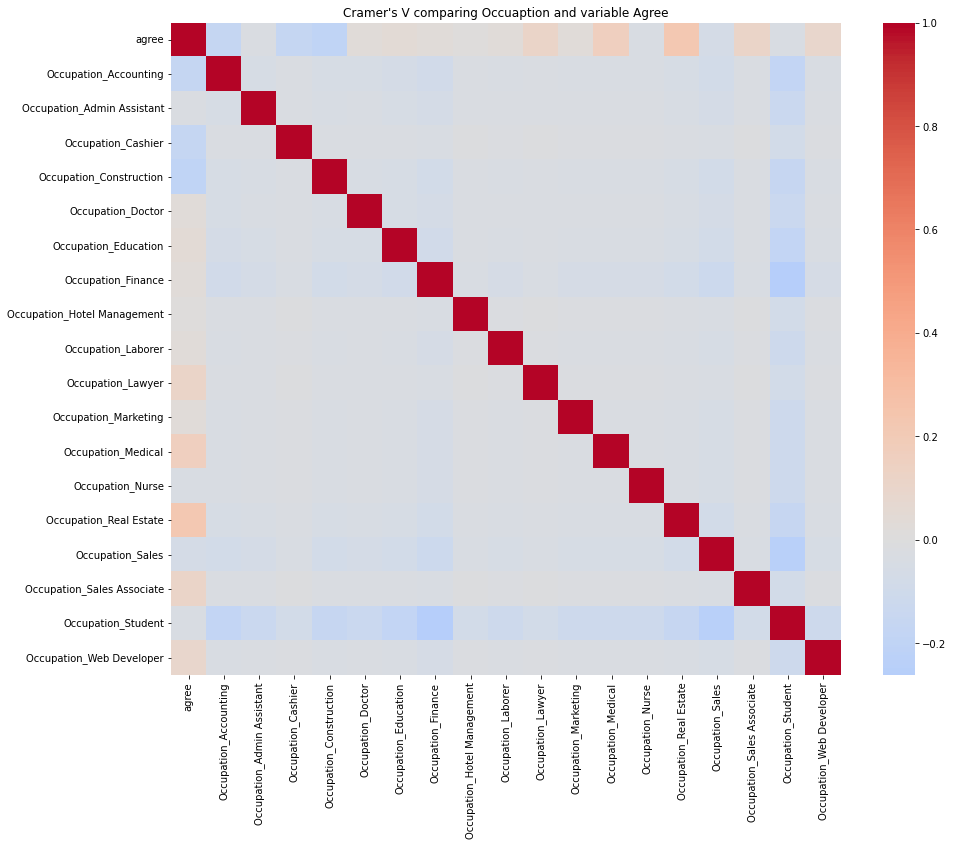

In [ ]:
# first chose your category columns of interest
df = news[['Occupation', 'agree']]

# now change this to dummy variables, one-hot encoded:
DataMatrix = pd.get_dummies(df)

# plot as simply as:
plt.figure(figsize=(15,12))  # for large datasets
plt.title('Cramer\'s V comparing Occuaption and variable Agree')
sns.heatmap(DataMatrix.corr('pearson'), cmap='coolwarm', center=0)


We see that for Occupations Medical, Real Estate, and Lawyer in this sample are slightly affected by the variable agree. The people in these professions in this sample tend to agree with more of the listed sources than the other professions, but we still can't really say, absed on the previous Chi-square test, that the p value is significant enough to reject the null hypothesis.

## 5) Does occupation influence agreement with certain news channels?  

> Hypothesis 0: The two variables have no relationship.


> Hypothesis 1: The two variables have a relationship.

In [ ]:
# CHI SQUARE TEST
# two qualitative
# create contingency table
data_crosstab = pd.crosstab(news['Occupation'],
                            news['Trusted Source'],
                           margins=True, margins_name="Total")

# significance level
alpha = 0.05

# Calcualtion of Chisquare
chi_square = 0
rows = news['Occupation'].unique()
columns = news['Trusted Source'].unique()
for i in columns:
    for j in rows:
        O = data_crosstab[i][j]
        E = data_crosstab[i]['Total'] * data_crosstab['Total'][j] / data_crosstab['Total']['Total']
        chi_square += (O-E)**2/E

# The p-value approach
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and p value is:", p_value)
print(conclusion)
    
# The critical value approach
print("\n--------------------------------------------------------------------------------------")
print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
critical_value = stats.chi2.ppf(1-alpha, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if chi_square > critical_value:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and critical value is:", critical_value)
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 85.900992063492  and p value is: 0.45225147085751005
Failed to reject the null hypothesis.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
chisquare-score is: 85.900992063492  and critical value is: 107.52174097071946
Failed to reject the null hypothesis.


The test is not significant. The p value is too large just like the other cases. We can not reject the null hypothesis, which does not imply that it is true either. We also can not say anything about Hypothesis 1.

**Cramer's V coefficient**

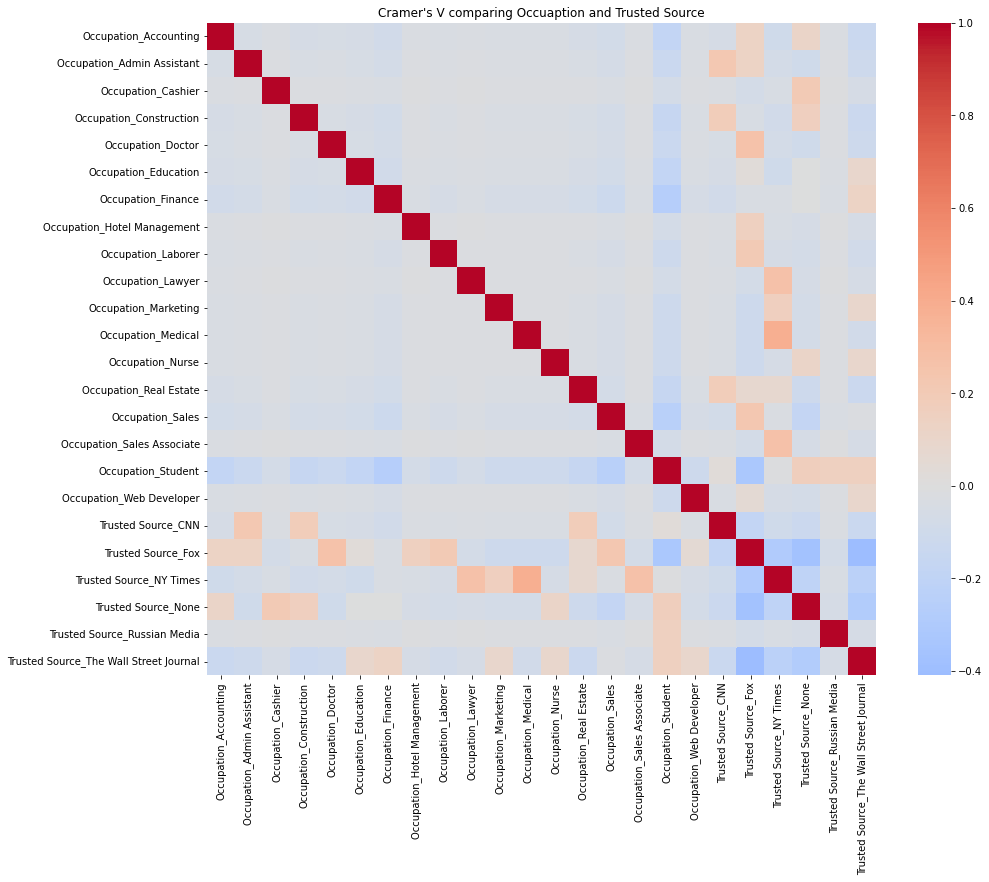

In [ ]:
# first chose your category columns of interest
df = news[['Occupation', 'Trusted Source']]

# now change this to dummy variables, one-hot encoded:
DataMatrix = pd.get_dummies(df)

# plot as simply as:
plt.figure(figsize=(15,12))  # for large datasets
plt.title('Cramer\'s V comparing Occuaption and Trusted Source')
sns.heatmap(DataMatrix.corr('pearson'), cmap='coolwarm', center=0)


There looks to be a slight relationship between people in the medical field and agreement with Fox News, which is interesting to know. But since the p value for the previous chi-square test > 0.05, we do not reject the null hypothesis that there is no relationship between the two variables.

This ends our statistical testing for 2 variables.

## Final Remarks:
According to a report found at https://today.yougov.com/topics/politics/articles-reports/2022/04/05/trust-media-2022-where-americans-get-news-poll, The Weather Channel, The Wall Street Journal and Public Service Broadcasting amoung the most reliable. NY Times in the middle and CNN and FoxNews last.  
  
  Most people trust Fox which is completely the opposite of evidence on the internet, and not many people trust CNN which is right along the lines with what Pew Research says. Very few people in the survey agree with 1 or all of the sources listed and most people agree with 2 or 3. They also mostly trust 2 or 3.

References:  
[1] scribbr.com/statistics/central-limit-theorem/#:~:text=The%20central%20limit%20theorem%20says,the%20mean%20will%20be%20normal  

[2] https://www.reneshbedre.com/blog/ttest.html    

[3] https://www.pewresearch.org/journalism/2019/12/12/factors-beyond-party-affiliation-also-connect-with-trust-in-the-news-media/  
[4] https://towardsdatascience.com/chi-square-test-with-python-d8ba98117626  
[5] https://aulaglobal.uc3m.es/pluginfile.php/5788186/mod_resource/content/5/T3Inference.pdf